## Panel 3B in Bloniasz, Oyama, Stephen (2024)

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from filtered_point_process.PointProcess import PointProcessModel
from filtered_point_process.FPP import FilteredPointProcess


In [ ]:
params_1 = {
    'method': 'AR(1)',
    'ar_coeffs': [1.9897557323136878, -0.9901],
    'white_noise_variance': 0.3,
    'fs': 1000,
    'T': 5,
    'Nsims': 1,
    'lambda_0': [150] # 75
}

AMPA_model = PointProcessModel(params = params_1, seed=45)

# Define the filters to be used
AMPA_filters = {
    'AMPA': 'AMPA',
    '1/f': '1/f'
}

# Instantiate the FilteredPointProcess 
fpp_AMPA = FilteredPointProcess(filters=AMPA_filters, model=AMPA_model)

spectra_AMPA = fpp_AMPA.get_spectra()


In [3]:
params_1 = {
    'method': 'AR(1)',
    'ar_coeffs': [1.9897557323136878, -0.9901],
    'white_noise_variance': 0.315,
    'fs': 1000,
    'T': 5,
    'Nsims': 1,
    'lambda_0': [100] # 75
}

GABA_model = PointProcessModel(params = params_1, seed=45)

# Define the filters to be used
GABA_filters = {
    'GABA': 'GABA',
    '1/f': '1/f'
}

# Instantiate the FilteredPointProcess class 
fpp_GABA = FilteredPointProcess(filters=GABA_filters, model=GABA_model)
spectra_GABA = fpp_GABA.get_spectra()
spectra_AMPA = fpp_AMPA.get_spectra()


# Filters

filters_GABA = fpp_GABA.get_filters()
filters_AMPA = fpp_AMPA.get_filters()

5.2700000000000005
5.7
62.65
5.7
62.65


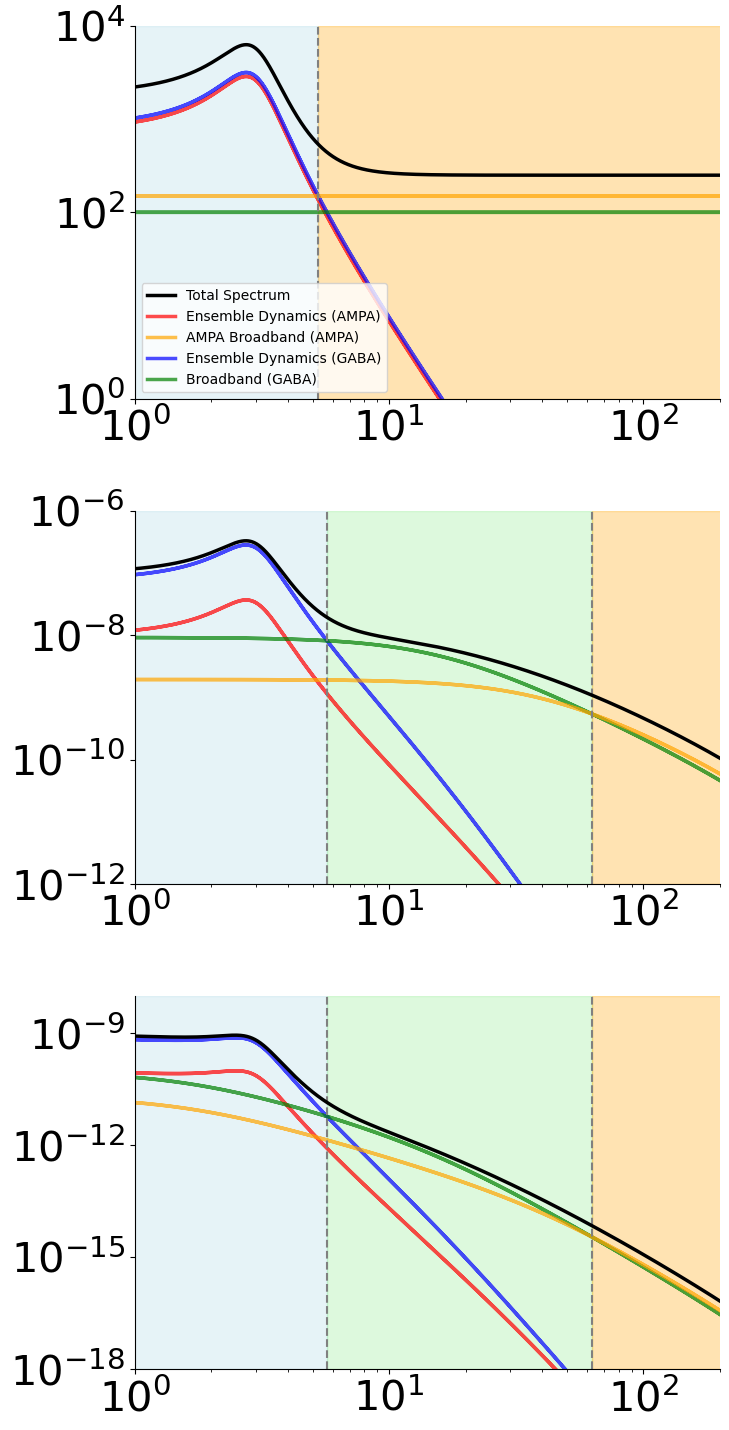

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Update global font size settings
plt.rcParams['font.size'] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['legend.fontsize'] = 10  

# Define the data for Plot 1
frequencies = np.abs(fpp_GABA.model.params['frequencies'])
total_spectrum_1 = GABA_model.pp_PSD + AMPA_model.pp_PSD
ampa_filtered_cif_1 = (fpp_AMPA.model.cif_PSD) 
gaba_filtered_cif_1 = (fpp_GABA.model.cif_PSD) 
gaba_filter_1 = ((fpp_GABA.model.pp_PSD - fpp_GABA.model.cif_PSD)) 
ampa_filter_1 = ((fpp_AMPA.model.pp_PSD - fpp_AMPA.model.cif_PSD)) 

total_spectrum_2 = spectra_GABA['pp * GABA'] + spectra_AMPA['pp * AMPA']
ampa_filtered_cif_2 = (fpp_AMPA.model.cif_PSD * filters_AMPA['AMPA']['power_spectrum']) / AMPA_model.params['fs']**2
gaba_filtered_cif_2 = (fpp_GABA.model.cif_PSD * filters_GABA['GABA']['power_spectrum']) / GABA_model.params['fs']**2
gaba_filter_2 = (filters_GABA['GABA']['power_spectrum'] * (fpp_GABA.model.pp_PSD - fpp_GABA.model.cif_PSD)) / GABA_model.params['fs']**2
ampa_filter_2 = (filters_AMPA['AMPA']['power_spectrum'] * (fpp_AMPA.model.pp_PSD - fpp_AMPA.model.cif_PSD)) / GABA_model.params['fs']**2
#gaba_filter_2 = (filters_GABA['GABA']['power_spectrum'] * (fpp_GABA.model.pp_PSD)) / GABA_model.params['fs']**2
#ampa_filter_2 = (filters_AMPA['AMPA']['power_spectrum'] * (fpp_AMPA.model.pp_PSD)) / GABA_model.params['fs']**2

# Define the data for Plot 3
total_spectrum_3 = spectra_GABA['pp * GABA * 1/f'] + spectra_AMPA['pp * AMPA * 1/f']
ampa_filtered_cif_3 = (fpp_AMPA.model.cif_PSD * filters_AMPA['AMPA']['power_spectrum'] * filters_AMPA['1/f']['power_spectrum']) / AMPA_model.params['fs']**2
gaba_filtered_cif_3 = (fpp_GABA.model.cif_PSD * filters_GABA['GABA']['power_spectrum'] * filters_GABA['1/f']['power_spectrum']) / GABA_model.params['fs']**2
gaba_process_3 = (filters_GABA['GABA']['power_spectrum'] * filters_GABA['1/f']['power_spectrum'] * (fpp_GABA.model.pp_PSD - fpp_GABA.model.cif_PSD)) / GABA_model.params['fs']**2
ampa_filter_3 = (filters_AMPA['AMPA']['power_spectrum'] * filters_AMPA['1/f']['power_spectrum'] * (fpp_AMPA.model.pp_PSD - fpp_AMPA.model.cif_PSD)) / GABA_model.params['fs']**2
#gaba_process_3 = (filters_GABA['GABA']['power_spectrum'] * filters_GABA['1/f']['power_spectrum'] * (fpp_GABA.model.pp_PSD)) / GABA_model.params['fs']**2
#ampa_filter_3 = (filters_AMPA['AMPA']['power_spectrum'] * filters_AMPA['1/f']['power_spectrum'] * (fpp_AMPA.model.pp_PSD )) / GABA_model.params['fs']**2

# Parameters
fs_half = AMPA_model.params['fs'] / 2

def plot_spectra(ax, frequencies, total_spectrum, filtered_cif_ampa, filtered_cif_gaba, process_gaba, process_ampa, y_limits, legend_order=None):
    # Prepare the data for shading
    lines = [filtered_cif_ampa, filtered_cif_gaba, process_gaba, process_ampa]
    line_labels = ['Ensemble Dynamics (AMPA)', 'Ensemble Dynamics (GABA)', 'Broadband (GABA)', 'AMPA Broadband (AMPA)']
    line_colors = ['red', 'blue', 'green', 'orange'] #['orange', 'blue', 'green', 'red'] 
    shading_colors = ['lightcoral', 'lightblue', 'lightgreen', 'orange'] #['orange', 'lightblue', 'lightgreen', 'lightcoral'] 

    # Plot the data
    line_handles = []
    for line, label, color in zip(lines, line_labels, line_colors):
        handle, = ax.loglog(frequencies, line, label=label, alpha=0.7, color=color, linewidth=2.5)
        line_handles.append(handle)
    dominant_indices = np.argmax(np.vstack(lines), axis=0)
    cutoff_index = np.searchsorted(frequencies, fs_half)

    # Shading regions based on the dominant line
    start = 0
    for i in range(1, cutoff_index):
        if dominant_indices[i] != dominant_indices[start]:
            ax.axvspan(frequencies[start], frequencies[i], color=shading_colors[dominant_indices[start]], alpha=0.3, zorder=0)
            ax.axvline(x=frequencies[i], color='gray', linestyle='--')  
            print(frequencies[i])
            start = i

    if start < cutoff_index:
        ax.axvspan(frequencies[start], fs_half, color=shading_colors[dominant_indices[start]], alpha=0.3)

    # Plot total spectrum on top
    ax.loglog(frequencies[:cutoff_index], total_spectrum[:cutoff_index], label='Total Spectrum', alpha=1, color='black', linewidth=2.5, zorder=6)
    
    total_spectrum_handle = ax.lines[-1]
    line_handles.append(total_spectrum_handle)
    line_labels.append('Total Spectrum')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xlim([1, 200])
    ax.set_ylim(y_limits)

    if legend_order is not None:
        ordered_handles = [line_handles[line_labels.index(label)] for label in legend_order]
        ax.legend(handles=ordered_handles, labels=legend_order, loc='lower left')

fig, axs = plt.subplots(3, 1, figsize=(8, 15))

# Define the legend order
legend_order = ['Total Spectrum', 'Ensemble Dynamics (AMPA)', 'AMPA Broadband (AMPA)', 'Ensemble Dynamics (GABA)', 'Broadband (GABA)']


plot_spectra(ax = axs[0], frequencies = frequencies, total_spectrum = total_spectrum_1, filtered_cif_ampa = ampa_filtered_cif_1, filtered_cif_gaba = gaba_filtered_cif_1, process_gaba = gaba_filter_1, process_ampa = ampa_filter_1, y_limits = [1, 10000], legend_order=legend_order)
plot_spectra(ax = axs[1], frequencies = frequencies, total_spectrum = total_spectrum_2, filtered_cif_ampa = ampa_filtered_cif_2, filtered_cif_gaba = gaba_filtered_cif_2, process_gaba = gaba_filter_2, process_ampa = ampa_filter_2, y_limits = [1e-12, 1e-6])
plot_spectra(ax = axs[2], frequencies = frequencies, total_spectrum = total_spectrum_3, filtered_cif_ampa = ampa_filtered_cif_3, filtered_cif_gaba = gaba_filtered_cif_3, process_gaba = gaba_process_3, process_ampa = ampa_filter_3, y_limits = [1e-18, 1e-8])

plt.tight_layout()

plt.show()
